In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [2]:
df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv')
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [3]:
print(df.isnull().sum())

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64


In [4]:
ndvi_cols =[ col for col in df.columns if '_N'in col]
df[ndvi_cols]= df[ndvi_cols].fillna(df[ndvi_cols].mean())

In [5]:
df.drop(columns=['ID'], inplace=True)

In [6]:
label_encoder=LabelEncoder()
df['class']=label_encoder.fit_transform(df['class'])

In [7]:
X = df.drop(columns=['class'])
y = df['class']
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2,stratify=y, random_state=42
                                                 )

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [9]:
grid_params = {'C': [0.1, 1, 10, 100], 'max_iter': [100, 300, 500]}
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs'),
                           grid_params, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 300, 500]},
             scoring='accuracy', verbose=1)

In [10]:
best_model = grid_search.best_estimator_

In [11]:
best_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, max_iter=300, multi_class='multinomial')

In [12]:
y_pred = best_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
accuracy_percent = accuracy * 100
print(f"Validation Accuracy: {accuracy_percent:.2f}%")
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))

Validation Accuracy: 96.31%
              precision    recall  f1-score   support

        farm       0.86      0.89      0.87       168
      forest       1.00      1.00      1.00      1232
       grass       0.87      0.69      0.77        39
  impervious       0.84      0.88      0.86       134
     orchard       0.67      0.33      0.44         6
       water       0.90      0.86      0.88        21

    accuracy                           0.96      1600
   macro avg       0.85      0.78      0.80      1600
weighted avg       0.96      0.96      0.96      1600



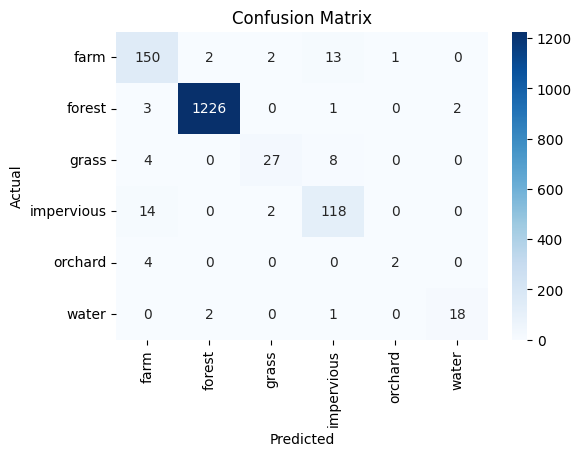

In [13]:
plt.figure(figsize=(6,4))
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
feature_importance = np.mean(best_model.coef_, axis=0) 

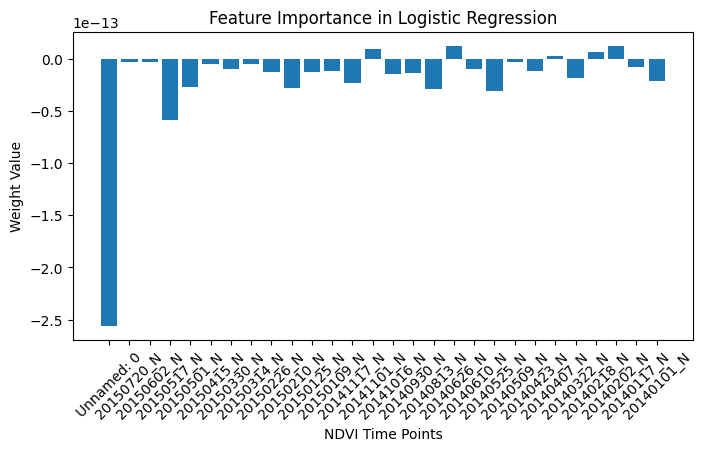

In [15]:
feature_names = X.columns
plt.figure(figsize=(8,4))
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=45)
plt.xlabel("NDVI Time Points")
plt.ylabel("Weight Value")
plt.title("Feature Importance in Logistic Regression")
plt.show()

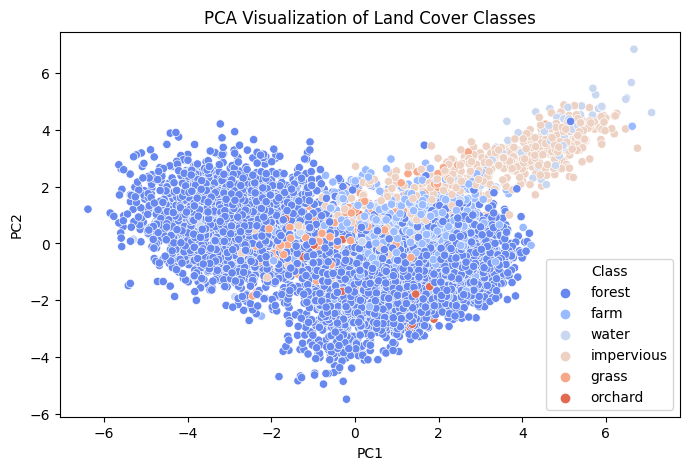

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = label_encoder.inverse_transform(y_train)

plt.figure(figsize=(8,5))
sns.scatterplot(x='PC1', y='PC2', hue='Class', palette='coolwarm', data=df_pca)
plt.title("PCA Visualization of Land Cover Classes")
plt.show()

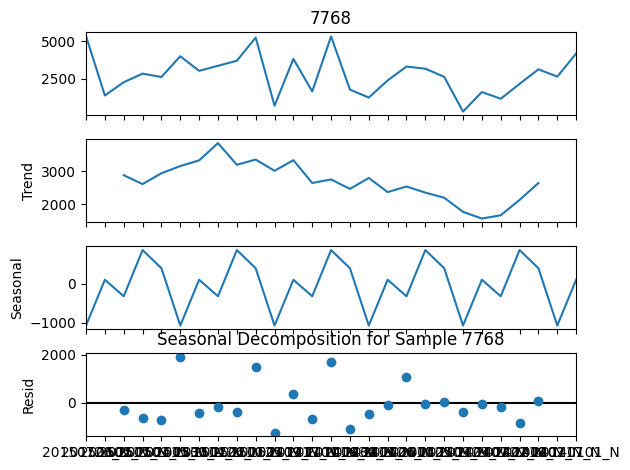

In [17]:
sample_index = np.random.choice(len(df))
sample_ndvi = df.iloc[sample_index][ndvi_cols]

result = seasonal_decompose(sample_ndvi, model="additive", period=5) 
result.plot()
plt.title(f"Seasonal Decomposition for Sample {sample_index}")
plt.show()

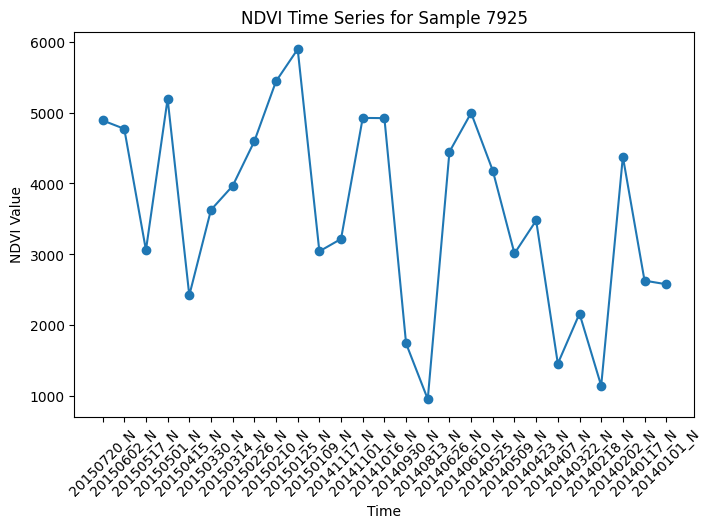

In [18]:
plt.figure(figsize=(8,5))
sample_index = np.random.choice(len(df))
plt.plot(ndvi_cols, df.iloc[sample_index][ndvi_cols], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("NDVI Value")
plt.title(f"NDVI Time Series for Sample {sample_index}")
plt.show()

In [19]:
test_df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')
test_ids = test_df['ID']
test_df.drop(['ID'], axis=1, inplace=True)

In [20]:
test_df[ndvi_cols]= test_df[ndvi_cols].fillna(X[ndvi_cols].mean())

In [21]:
test_scaled = scaler.transform(test_df)

In [22]:
test_pred = best_model.predict(test_scaled)
test_labels = label_encoder.inverse_transform(test_pred)

In [23]:
submission = pd.DataFrame({
    'ID': test_ids,
    'class': test_labels
})

In [24]:
submission.to_csv('submission.csv', index=False)